In [1]:

from data_processing.resize_images import resize_image_with_annotations

## Image Preprocessing: Convert RGB to Tensor

In [12]:

resize = resize_image_with_annotations(image_path="data/images/maksssksksss2.png",xml_path="data/annotations/maksssksksss2.xml",method = 'resize')
pad_resize = resize_image_with_annotations(image_path="data/images/maksssksksss2.png",xml_path="data/annotations/maksssksksss2.xml",method = 'pad_resize')
resize_pad = resize_image_with_annotations(image_path="data/images/maksssksksss2.png",xml_path="data/annotations/maksssksksss2.xml",method = 'resize_pad')

2025-02-16 13:02:57,807 - INFO - data/annotations/maksssksksss2.xml : Sucessfully extracted size attributes of image!. Height:290, width:400, depth:3
2025-02-16 13:02:57,808 - INFO - Person with_mask and Bounding box at (68, 42) to (105, 69)
2025-02-16 13:02:57,809 - INFO - Person with_mask and Bounding box at (154, 47) to (178, 74)
2025-02-16 13:02:57,809 - INFO - Person with_mask and Bounding box at (238, 34) to (262, 69)
2025-02-16 13:02:57,810 - INFO - Person mask_weared_incorrect and Bounding box at (333, 31) to (366, 65)
2025-02-16 13:02:57,836 - INFO - ✅ Processed: data/images/maksssksksss2.png, New Size: (224, 224)
2025-02-16 13:02:57,837 - INFO - 🔄 Adjusted Bounding Box for with_mask: (38, 32) to (58, 53)
2025-02-16 13:02:57,838 - INFO - 🔄 Adjusted Bounding Box for with_mask: (86, 36) to (99, 57)
2025-02-16 13:02:57,839 - INFO - 🔄 Adjusted Bounding Box for with_mask: (133, 26) to (146, 53)
2025-02-16 13:02:57,840 - INFO - 🔄 Adjusted Bounding Box for mask_weared_incorrect: (186

In [13]:
# Shape of tensor
resize[0].shape

torch.Size([3, 224, 224])

# Resize image

[{'label': 'with_mask', 'coordinates': {'xmin': 38, 'ymin': 32, 'xmax': 58, 'ymax': 53}}, {'label': 'with_mask', 'coordinates': {'xmin': 86, 'ymin': 36, 'xmax': 99, 'ymax': 57}}, {'label': 'with_mask', 'coordinates': {'xmin': 133, 'ymin': 26, 'xmax': 146, 'ymax': 53}}, {'label': 'mask_weared_incorrect', 'coordinates': {'xmin': 186, 'ymin': 23, 'xmax': 204, 'ymax': 50}}]


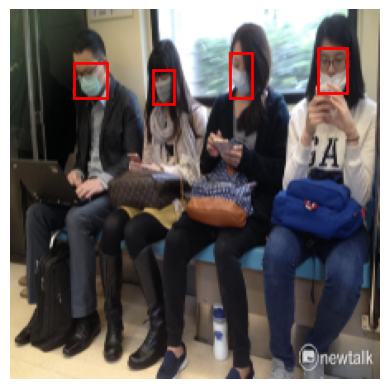

In [ ]:
import matplotlib.pyplot as plt
import torch
import matplotlib.patches as patches

def visualize_image(image_boundingbox):
    # Step 1 convert tensor to format that can shown as image(using matplotlib)
    image_tensor = image_boundingbox[0]
    image_tensor = image_tensor.permute(1,2,0)#Convert tensor (C,H,W) -> (H,W,C)
    image_tensor = image_tensor.numpy() #Matplot lib takes numpy input
    fig, ax = plt.subplots(1)
    ax.imshow(image_tensor)

    #Step 2 put bounding boxes on image
    annotations = image_boundingbox[1]['annotations']
    print(annotations)
    for bbox in annotations:
        coordinates = bbox['coordinates']
        x_min = coordinates['xmin']
        y_min = coordinates['ymin']
        x_max = coordinates['xmax']
        y_max = coordinates['ymax']

        width = x_max - x_min
        height = y_max - y_min

        box = patches.Rectangle((x_min, y_min), width, height, linewidth=2, edgecolor='r', facecolor='none') #Creates a box
        ax.add_patch(box)


    plt.axis("off")  
    plt.show()


   


visualize_image(resize)


# Pad and Resize

[{'label': 'with_mask', 'coordinates': {'xmin': 38, 'ymin': 54, 'xmax': 58, 'ymax': 69}}, {'label': 'with_mask', 'coordinates': {'xmin': 86, 'ymin': 57, 'xmax': 99, 'ymax': 72}}, {'label': 'with_mask', 'coordinates': {'xmin': 133, 'ymin': 49, 'xmax': 146, 'ymax': 69}}, {'label': 'mask_weared_incorrect', 'coordinates': {'xmin': 186, 'ymin': 48, 'xmax': 204, 'ymax': 67}}]


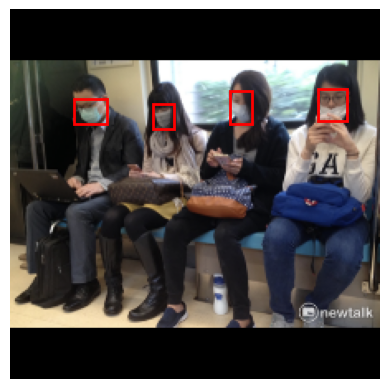

In [15]:
visualize_image(pad_resize)


# Resize and pad

[{'label': 'with_mask', 'coordinates': {'xmin': 38, 'ymin': 54, 'xmax': 58, 'ymax': 69}}, {'label': 'with_mask', 'coordinates': {'xmin': 86, 'ymin': 57, 'xmax': 99, 'ymax': 72}}, {'label': 'with_mask', 'coordinates': {'xmin': 133, 'ymin': 50, 'xmax': 146, 'ymax': 69}}, {'label': 'mask_weared_incorrect', 'coordinates': {'xmin': 186, 'ymin': 48, 'xmax': 204, 'ymax': 67}}]


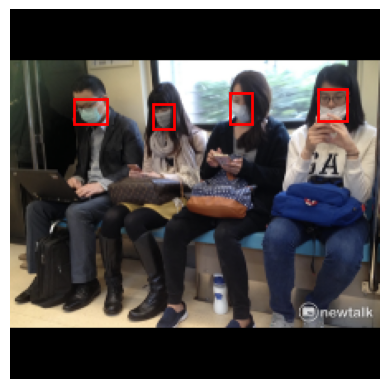

In [16]:
visualize_image(resize_pad)

In [2]:
resize = resize_image_with_annotations(image_path="data/images/pad_resize/maksssksksss2.png",xml_path="data/annotations/pad_resize/maksssksksss2.xml",method = 'pad_resize')


2025-02-18 00:11:13,602 - ERROR - Image or XML file not found: data/images/pad_resize/maksssksksss2.png | data/annotations/pad_resize/maksssksksss2.xml
